<H1><center>Model For Predicting Fraudulent Transactions</H1></center>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
# Load the CSV data
df = pd.read_csv('fraud.csv')

<h2>Information About the Data</h2>

In [8]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [9]:
# Check for missing values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [10]:
# Explore basic statistics of the numerical columns
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

<h2>Data Cleaning and Preprocessing</h2>

In [11]:
# Feature engineering and preprocessing
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Drop duplicates
df.drop_duplicates(inplace=True)

# Dropping 'type' column if it still exists
if 'type' in df.columns:
    df.drop(['type', 'nameOrig', 'nameDest'], axis=1, inplace=True)
else:
    print("Column 'type' not found after removing duplicates.")



<h2>Splitting Data</h2>

In [12]:
# Splitting the data into features (X) and target variable (y)
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

In [13]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

<h2>Training the Model</h2>

In [14]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

<h2>Model Evaluation</h2>

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [17]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9996732871049976
Confusion Matrix:
[[5083389      97]
 [   1566    5044]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083486
           1       0.98      0.76      0.86      6610

    accuracy                           1.00   5090096
   macro avg       0.99      0.88      0.93   5090096
weighted avg       1.00      1.00      1.00   5090096



<h2><b>Visualization</h2></b>

<H2>Distribution of Fraudulent Transactions</H2>

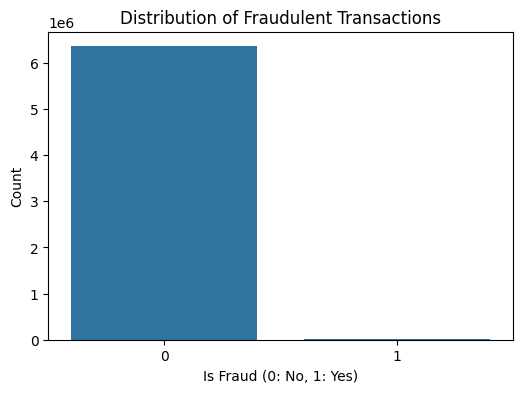

In [18]:
# Visualize the distribution of the target variable 'isFraud'
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Is Fraud (0: No, 1: Yes)')
plt.show()


<H2>Key Factors Predicting Fraudulent Transactions</H2>

In [19]:
feature_importances = model.feature_importances_

In [20]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


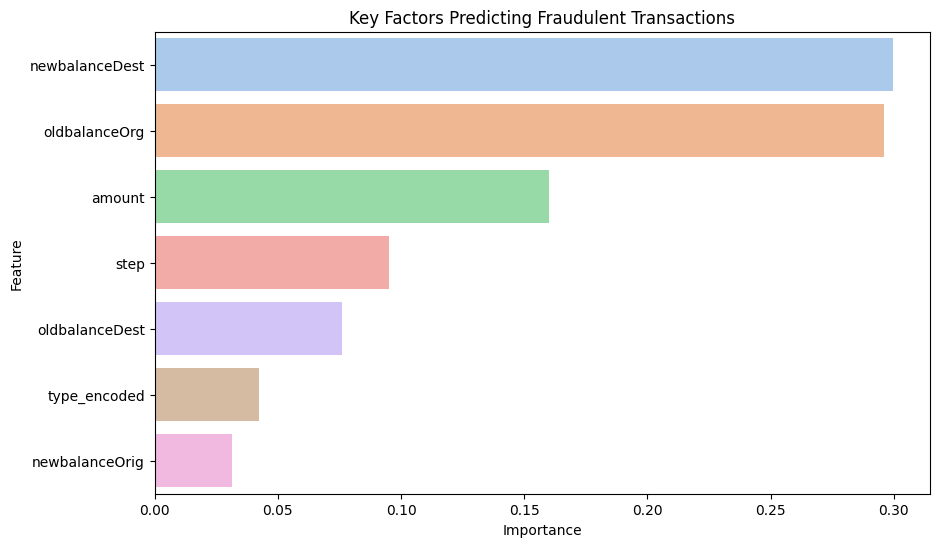

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='pastel')
plt.title('Key Factors Predicting Fraudulent Transactions')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<h3></h3>

<ul><h3><li>Fraudulent customers may show a tendency to initiate transactions with lower initial balances and involve larger amounts.
Monitoring accounts with these characteristics could be a valuable strategy for detecting potential fraudulent activities.</h3></li>
<h3><li>Pattern Recognition: By considering both the originating and destination account balances, our model can learn patterns associated with legitimate transactions and identify deviations that may signal potential fraud</h3></ul></li>

In [ ]:
# Example visualization code (assumes 'df' is your DataFrame)

plt.figure(figsize=(6, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=df, alpha=0.5)
plt.title('Scatter Plot of oldbalanceOrg vs. amount')
plt.xlabel('oldbalanceOrg')
plt.ylabel('amount')
plt.show()

<H3>Explanation-</H3>
<h4>Cluster around (0, 0.0):
A concentration of points around (0, 0.0) suggests a pattern where transactions originate from an account with an 'oldbalanceOrg' close to zero, and the destination account ('newbalanceDest') ends up with a balance of 0.0.
<h4>Emptying Destination Accounts:
This pattern might be indicative of transactions aimed at completely emptying the funds from the destination account after the transaction.</h4>

<h1> Fraud Detection Model Elaboration</h1>

<body><p>Data Loading and Preprocessing:
The dataset is loaded using Pandas (pd.read_csv('fraud.csv')).
Label encoding is applied to the 'type' column, creating a new column 'type_encoded'. Columns 'type', 'nameOrig', and 'nameDest' are dropped from the DataFrame.

Train-Test Split:
The data is split into features (X) and the target variable (y).	
The 'isFraud' and 'isFlaggedFraud' columns are dropped from the features (X).
The dataset is further split into training and testing sets using train_test_split.

Random Forest Model Creation:
A Random Forest model is created using RandomForestClassifier.
The model is trained on the training data (model.fit(X_train, y_train)).

Making Predictions:
Predictions are made on the test set using model.predict(X_test).

Model Evaluation:
The model's performance is evaluated using metrics such as accuracy, confusion matrix, and classification report.

Visualizations:
The distribution of the target variable 'isFraud' is visualized using sns.countplot.
Feature importances are calculated using model.feature_importances_.The importance scores are visualized using a bar plot (sns.barplot) to identify key factors predicting fraudulent transactions.</p></body>


<h1>Variable Selection in Model</h1>
<p>Label Encoding:
The 'type' column is label-encoded to convert categorical data into numerical format. The encoded values are stored in a new column called 'type_encoded'. This is a common step when dealing with machine learning algorithms that require numerical input.

Column Dropping:
Columns 'type', 'nameOrig', and 'nameDest' are dropped using the drop method. The rationale for dropping these columns may include:
'type': Since machine learning models typically require numerical input, categorical variables like 'type' are encoded and the original column is dropped.
'nameOrig' and 'nameDest': These columns might be dropped if they are considered unnecessary for the modeling process.
Names or identifiers may not be relevant features for fraud detection, and removing them could simplify the model.
</p>
<p>In summary, the variables selected for inclusion in the model are those that remain after label encoding and dropping unnecessary columns. 
The key features used for training the Random Forest model include the features related to the transaction itself 
(e.g., 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest') and the encoded 'type' column.
The target variable is 'isFraud'. The decision to drop certain columns is often based on domain knowledge, feature importance analysis, or the nature of the problem being addressed.</p>

<H3><B>Prevention Techniques which can  be adopted</B></H3>
<body>prevention which can  be adopted while company update its infrastructure

Authentication and Authorization:
Implement strong authentication mechanisms and strict authorization controls to verify the identity of users and control their access to critical systems and data.
Real-time Monitoring and Anomaly Detection:

Deploy real-time monitoring systems with anomaly detection capabilities to identify unusual patterns or activities that may indicate potential fraud.
Multi-Factor Authentication (MFA):

Enforce multi-factor authentication for user accounts, adding an extra layer of security beyond passwords to prevent unauthorized access.

Fraud Analytics and Machine Learning Models:
Integrate advanced fraud analytics and machine learning models to automatically detect and flag suspicious transactions or behaviors.</body>

<h3><b>Assuming these actions have been implemented, how would you they work</b></h3>
<body>Monitoring Login Attempts:
Metric: Track successful and unsuccessful login attempts.
Evaluation: A decrease in unauthorized access attempts indicates improved authentication.
Testing: Perform penetration testing to identify vulnerabilities.

Penetration Testing:
<ul><li>Metric: Conduct tests to identify vulnerabilities.</li>
<li>Evaluation: Success indicates addressed weaknesses.</li>
<li>Testing: Regularly perform penetration testing.</li></ul>

Multi-Factor Authentication (MFA):

<li>Metric: Monitor successful logins with MFA.</li>
<li>Evaluation: Increased MFA use indicates success.</li>
<li>Testing: Simulate attacks to verify MFA effectiveness.</li>
</br>

<b>To determine if the implemented actions for fraud analytics and machine learning models are effective, follow these evaluation steps:</b>
<h2>Evaluation Metrics:</h2>

<li>Precision, Recall, and F1 Score: Calculate precision (positive predictive value), recall (sensitivity), and F1 score to measure the model's ability to identify fraud while minimizing false positives.</li>

Area Under the ROC Curve (AUC-ROC): Evaluate the model's overall performance by examining the ROC curve and AUC-ROC.

<li>Confusion Matrix Analysis:
True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN): Analyze the confusion matrix to understand where the model is making errors and adjust thresholds accordingly.</body></li>


<H1>Class Imbalancement</H1>

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [24]:
# Feature engineering and preprocessing
if 'type' in df.columns:
    label_encoder = LabelEncoder()
    df['type_encoded'] = label_encoder.fit_transform(df['type'])

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    # Check if 'type' column exists before dropping it
    if 'type' in df.columns:
        df.drop(['type', 'nameOrig', 'nameDest'], axis=1, inplace=True)
    else:
        print("Column 'type' not found after removing duplicates.")

    # Splitting the data into features (X) and target variable (y)
    X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
    y = df['isFraud']
else:
    print("Column 'type' not found.")


Column 'type' not found.


In [25]:
# Balancing the classes using Random Over-Sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y)

In [26]:
# Balancing the classes using Random Under-Sampling
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_over, y_over)

In [27]:
# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9999291830398102
Confusion Matrix:
[[634954     90]
 [     0 635838]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635044
           1       1.00      1.00      1.00    635838

    accuracy                           1.00   1270882
   macro avg       1.00      1.00      1.00   1270882
weighted avg       1.00      1.00      1.00   1270882



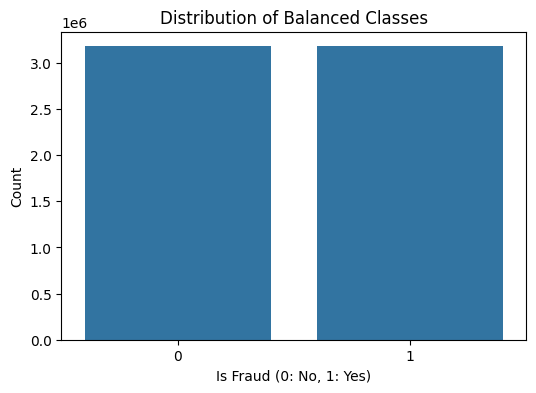

In [30]:
# Visualize the distribution of the target variable 'isFraud'
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=pd.DataFrame(y_resampled, columns=['isFraud']))
plt.title('Distribution of Balanced Classes')
plt.ylabel('Count')
plt.xlabel('Is Fraud (0: No, 1: Yes)')
plt.show()


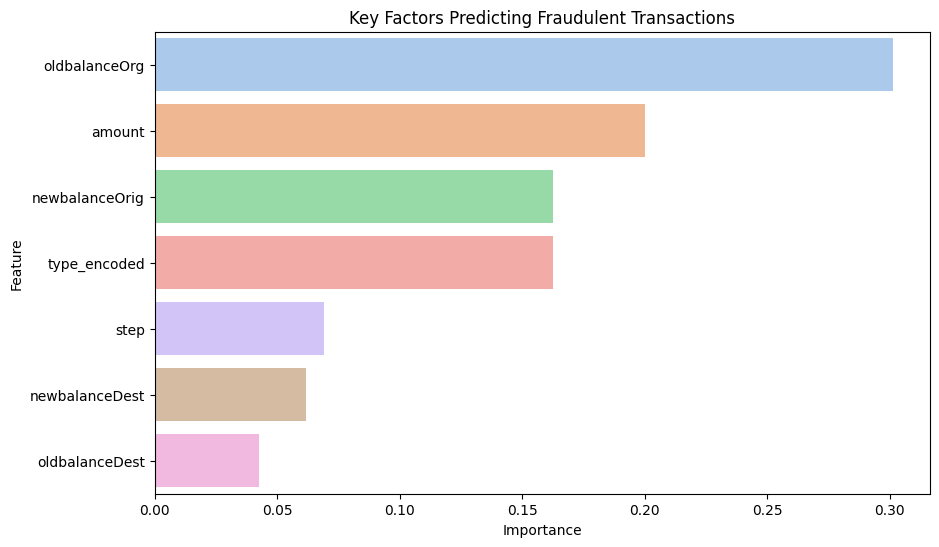

In [31]:
# Visualize the feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='pastel')
plt.title('Key Factors Predicting Fraudulent Transactions')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()